In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
import seaborn as sns 
import colossus
sns.set_style("darkgrid")

# Colossus: Generate the Halo Mass Function under different redshifts
In this code, we use Colossus to generate the halo mass function at different redshifts. When we calculate the total lensing cross-section, we need to know the number of available lenses in the universe at a particular instance. Therefore, we need to use Colossus to generate a comoving number density of haloes per its mass in redshift $z_{L}$ for a given mass range. 

website of Colossus: http://www.benediktdiemer.com/code/colossus/

In [2]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

cosmology.setCosmology('planck13')
### Mass Range 
m = np.linspace(1E12,3*1E15, 10000)
mfunc_fof = mass_function.massFunction(m,z =0.0 , q_in= "M", q_out="dndlnM", mdef='200c', model = 'tinker08')

In [3]:
mfunc_fof

array([3.54361110e-03, 2.78732994e-03, 2.30373040e-03, ...,
       2.36600235e-09, 2.36458634e-09, 2.36317123e-09])

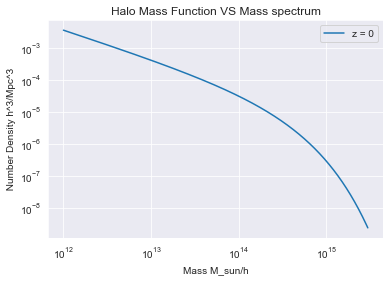

In [4]:
plt.plot(m,mfunc_fof, label=r"z = 0")
plt.title("Halo Mass Function VS Mass spectrum")
plt.xlabel(r"Mass M_sun/h")
plt.ylabel(r" Number Density h^3/Mpc^3") 
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [5]:

dlnm= np.log(m[-1]) - np.log(m[0])

In [6]:
dlnm

8.006367567650244

# Total Lensing Cross-section ( Optical Depth) 

The total lensing cross-section is given by the sum of available lenses at the universe at particular instant and its cross-section. Therefore, we need to (total number/ number density, etc) of available lenses at a certain redshift. In this code, we use the comoving number density of haloes per its logarithm of mass. In order to understand the total lensing cross-section for a source, we can imagine the physical picture as follow: 

Suppose we have a gravitational waves source from redshift $z_{S}$. When it is emitted from $z_{S}$, it will pass through the universe and approaching to us $z = 0$. However, during its propagation, it will pass through haloes in the universe, resulting in graviational lensing. Therefore, our job is to calculating the total lensing cross-section of gravitatinal waves source originates from $z_{S}$ which is the sum of the lensing cross-section of each hales at different lenses redshifts $z_{L} \in (0, z_{S})$.The equation of total lensing cross-section is given by the follow: 
\begin{equation}
\sigma^{S}_{total}(\mu,z_{S}) =  \frac{8 \pi^{3} G^{2}}{c^{4}}\frac{(\mu_{0}^{2}+1)}{(\mu_{0}^{2} -1)^{2}} \int^{z_{S}}_{0} \int_{\Omega_{M}} \frac{dn(M,z_{L})}{d \ln{M}} \Big( \frac{M}{r_{200}} \Big)^{2}\Big( \frac{d_{A}(z_{L},z_{S})}{d_{A}(z_{s})} \Big)^{2} d\ln{M} dV(z_{L})
\end{equation}
$\Omega_{M}$ is the integral domain of mass of available lenses in particular lens redshift $z_{L}$.  This lensing cross-section will tell us the relevant probability of a gravitational waves source in $z_{S}$ will be maginified by $\mu$.

In astropy Libary, we can call cosmo.differential_comoving_volume(z) to calculate the differential volume. However, the unit of differential comoving volume is in volume per solid angle per redshift. Therefore, when we need to calculate the integral of differential volume, we are in fact calculating this:
\begin{equation}
dV = 4 \pi \Big(\frac{dV}{d \Omega dz} \Big)_{astropy} dz
\end{equation}

Hence, the equation becomes:
\begin{equation}
\sigma^{S}_{total}(\mu,z_{S}) =  \frac{8 \pi^{3} G^{2}}{c^{4}}\frac{(\mu_{0}^{2}+1)}{(\mu_{0}^{2} -1)^{2}} \int^{z_{S}}_{0} \int_{\Omega_{M}} \frac{dn(M,z_{L})}{d \ln{M}} \Big( \frac{M}{r_{200}} \Big)^{2}\Big( \frac{d_{A}(z_{L},z_{S})}{d_{A}(z_{s})} \Big)^{2} d\ln{M}  \Big(4 \pi \Big(\frac{dV}{dz_{L}} \Big) \Big)dz_{L}
\end{equation}

In [9]:
# Using Astropy to calculate the total lensing cross section of source plane 
import astropy 
#from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u
#cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)
from colossus.halo import mass_so


## constants in computation
c = 3E8
G = 6.6748E-11
H_0 = cosmo.H(0)

#Assume Virial mass
def r_200(m,zl): 
    return (m*G/(100*Hubble(zl)**2))**(1/3)

### Colossus R_200c function 
def R_200c(m,zl):
    #return np.array([mass_so.M_to_R(m, i, '200c') for i in zs])
    return mass_so.M_to_R(m, zl, '200c')

# Comoving Number density of Haloes per ln(Haloes Mass)
def dndlnm(m,zl):
    return  mass_function.massFunction(m,z=zl , q_in= "M", q_out="dndlnM", mdef='200c', model = 'watson13')

# Maginification of Gravotational waves 
def mu_gw(zs):
    # zs > 0.3 by computation
    return (cosmo.luminosity_distance(zs)/cosmo.luminosity_distance(0.15))**2 

In [10]:
# Gws source range z_{S} = 0.01 ~ 5 since z_{L} < z_{S}
zs = np.linspace(0.1,5,40)

# Testing: Cross-section with correct unit :

As the Numpy array does not support unit, therefore we manipulate the intergal first and neglect the unit it has. After we get the numerical result, we add the unit later. 



In [11]:
from astropy.constants import G,c

### neglect 4*pi from the differential comoving volume  
const  = 8*np.pi**3*G**2*c**-4
const = const.to(u.Mpc**2 / u.Msun**2)

In [12]:
const

<Quantity 5.68040068e-37 Mpc2 / solMass2>

In [13]:
# The integrand, we have pull the d_{A}(z_S) out of the integrand as it does not involve z_{L}

def integrand_without_const(m,zs):
    #const = 32*np.pi**4*G**2*c**-4
    f = lambda i:np.average(dndlnm(m,i)*(m/R_200c(m,i))**2)*8.006367567650244*cosmo.differential_comoving_volume(i).value*\
    cosmo.angular_diameter_distance_z1z2(i,zs).value**2
    result = integrate.quad(f,0,zs)
    return result[0]

In [14]:
# The lensing dimensionless lensing cross-section without constant term 


cross_sec_without_const =  np.asarray([cosmo.angular_diameter_distance(i).value**-2*integrand_without_const(m,i) for i in zs])

In [15]:
# In here, we add the unit of dimensionless cross-section in order to correct the order  
A = cross_sec_without_const
A = A[:]*(u.Msun**2* u.kpc**-2)

# We convert the unit Kpc to Mpc in order to cancel match the dimension of the constant term that we have defined previously
A = A.to(u.Msun**2 * u.Mpc**-2)


In [16]:
# Corrected dimesnional lensing cross-section without constant term 
A

<Quantity [4.64260124e+30, 4.32559341e+31, 1.32108199e+32, 2.67934269e+32,
           4.39499400e+32, 6.34148643e+32, 8.40803871e+32, 1.05092428e+33,
           1.25847472e+33, 1.45950168e+33, 1.65162642e+33, 1.83359242e+33,
           2.00490774e+33, 2.16557990e+33, 2.31592743e+33, 2.45645018e+33,
           2.58774258e+33, 2.71043707e+33, 2.82516832e+33, 2.93255134e+33,
           3.03316906e+33, 3.12756586e+33, 3.21624509e+33, 3.29966902e+33,
           3.37826019e+33, 3.45240380e+33, 3.52245022e+33, 3.58871793e+33,
           3.65149622e+33, 3.71104797e+33, 3.76761210e+33, 3.82140595e+33,
           3.87262740e+33, 3.92145678e+33, 3.96805865e+33, 4.01258337e+33,
           4.05516847e+33, 4.09593990e+33, 4.13501327e+33, 4.17249469e+33] solMass2 / Mpc2>

In [17]:
# Correct lensing cross-section 
# In this result, it does not involve the term (mu^2 +1)/ (mu^2 -1)^2, it will be specified in the graph 
cross_sec_with_unit = const*A

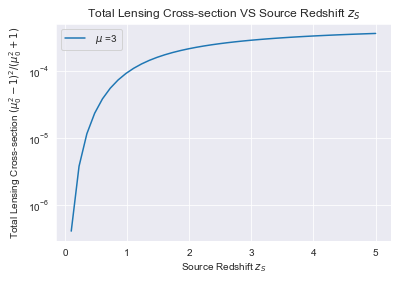

In [18]:
# The extra factor 10/64 is come from the lensing magnification factor (mu^2 +1)/ (mu^2 -1)^2 when mu = 3
plt.plot(zs,10*64**-1*cross_sec_with_unit,label=r" $\mu$ =3 " )
plt.ylabel(r"Total Lensing Cross-section $(\mu_{0}^{2} -1)^{2}/ (\mu_{0}^{2} + 1)$")
plt.xlabel(r"Source Redshift $z_{S}$")
plt.title(r"Total Lensing Cross-section VS Source Redshift $z_{S}$")
plt.yscale("log")
plt.legend()
plt.savefig("cross_sec_dndM_ver.pdf")